# Opis zbioru

## Zawartość:
Zbiór zawiera dane z rankingu szczęścia/zadowolenia ludzi w poszczególnych krajach

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


# Analiza

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('World-happiness-report-2024.csv')

### Policzenie statystyk

In [42]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


### Analiza zmiennych w zależności od przynależności do grupy

Text(0.5, 1.0, 'Number of countries in the dataset from each region')

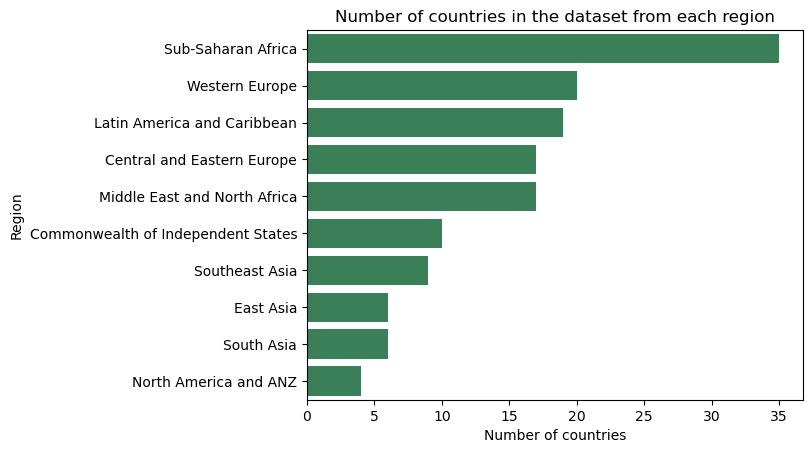

In [85]:
# Jako, ze trzeba uzyc GroupBy, to może: ile mamy w zbiorze krajów z danego regionu?
df1 = df.groupby('Regional indicator').count()['Country name']
df1 = df1.reset_index().rename(columns={'Country name': 'count'}).sort_values(by='count', ascending=False)
sns.barplot(x='count', y='Regional indicator', data=df1, color = "seagreen")
plt.xlabel('Number of countries')
plt.ylabel('Region')
plt.title('Number of countries in the dataset from each region')


### 2 wykresy analizujące rozkład zmiennych w zbiorze danych razem z wnioskami

Text(0.5, 1.0, 'Ladder score by region')

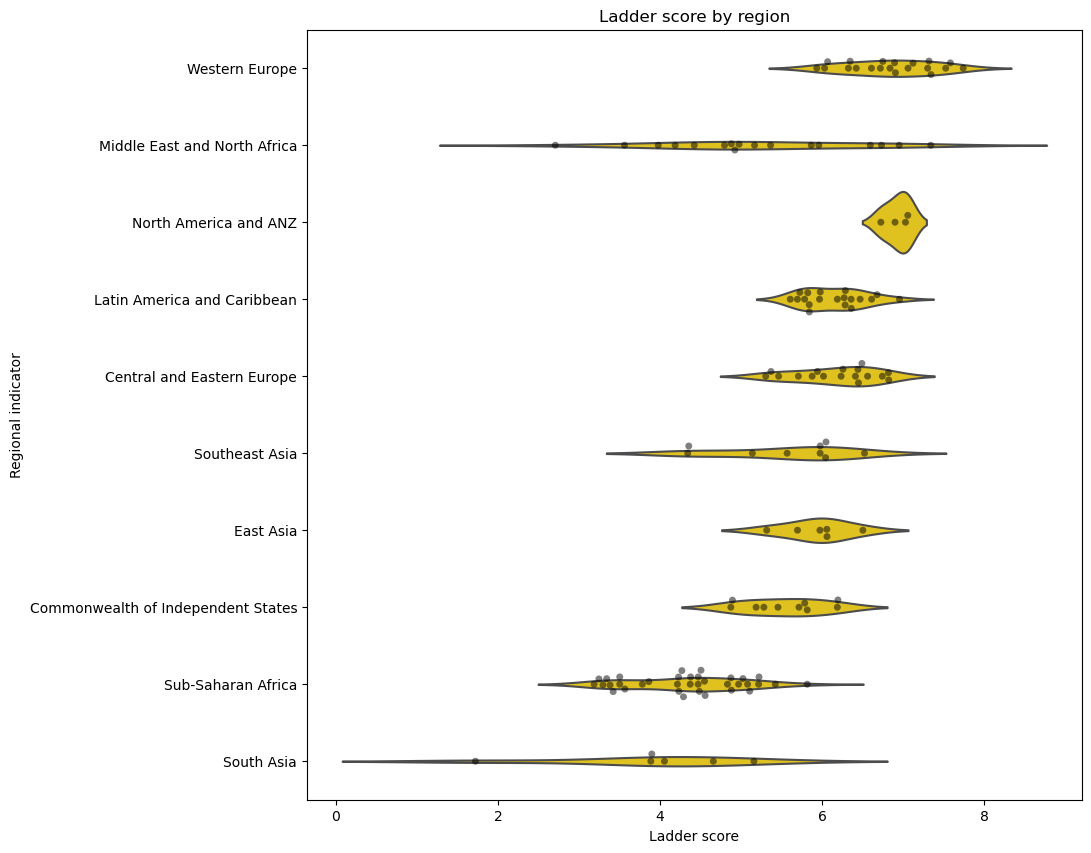

In [40]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Ladder score', y='Regional indicator', data=df, color='gold', inner=None)
sns.swarmplot(x='Ladder score', y='Regional indicator', data=df, color='black', alpha=0.5)
plt.title('Ladder score by region')

#### Wnioski:
Większość krajów o niskim poziomie szczęścia znajduje się w subsaharyjskiej Afryce, a w Europie wszystkie kraje są stosunkowo szczęśliwe i znajdują się tam kraje o największym szczęśćiu wśród wszystkich.

Text(0.5, 1.0, 'Boxplot for chosen columns')

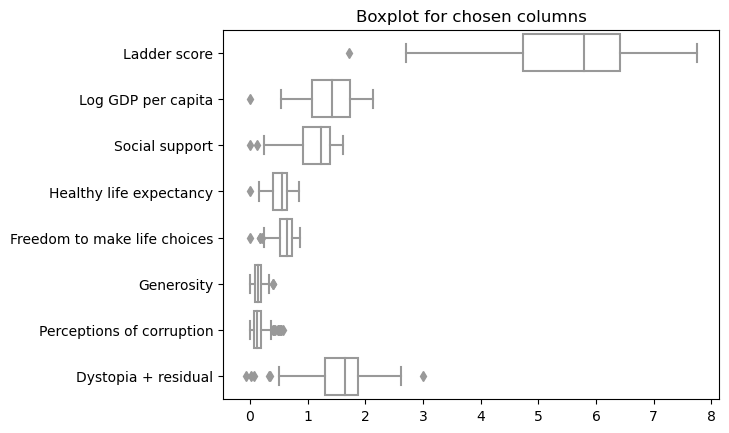

In [87]:
stats_df = df.drop(['upperwhisker', 'lowerwhisker'], axis=1)
sns.boxplot(data=stats_df, color='w', orient='h')
plt.title('Boxplot for chosen columns')

### Wnioski:
Nie wiem. W ogóle to nie rozumiem, jakim cudem Social Support opisane jako średnia ze zmiennej binarnej (1 lub 0) może być większa od 1.
I podobnie Healthy life expectancy ma niby być w latach, a przyjmuje tylko wartości między zerem a jeden. Coś tu jest mocno podejrzane.

### 2 wykresy wskazujące zależności w zbiorze danych z wnioskami

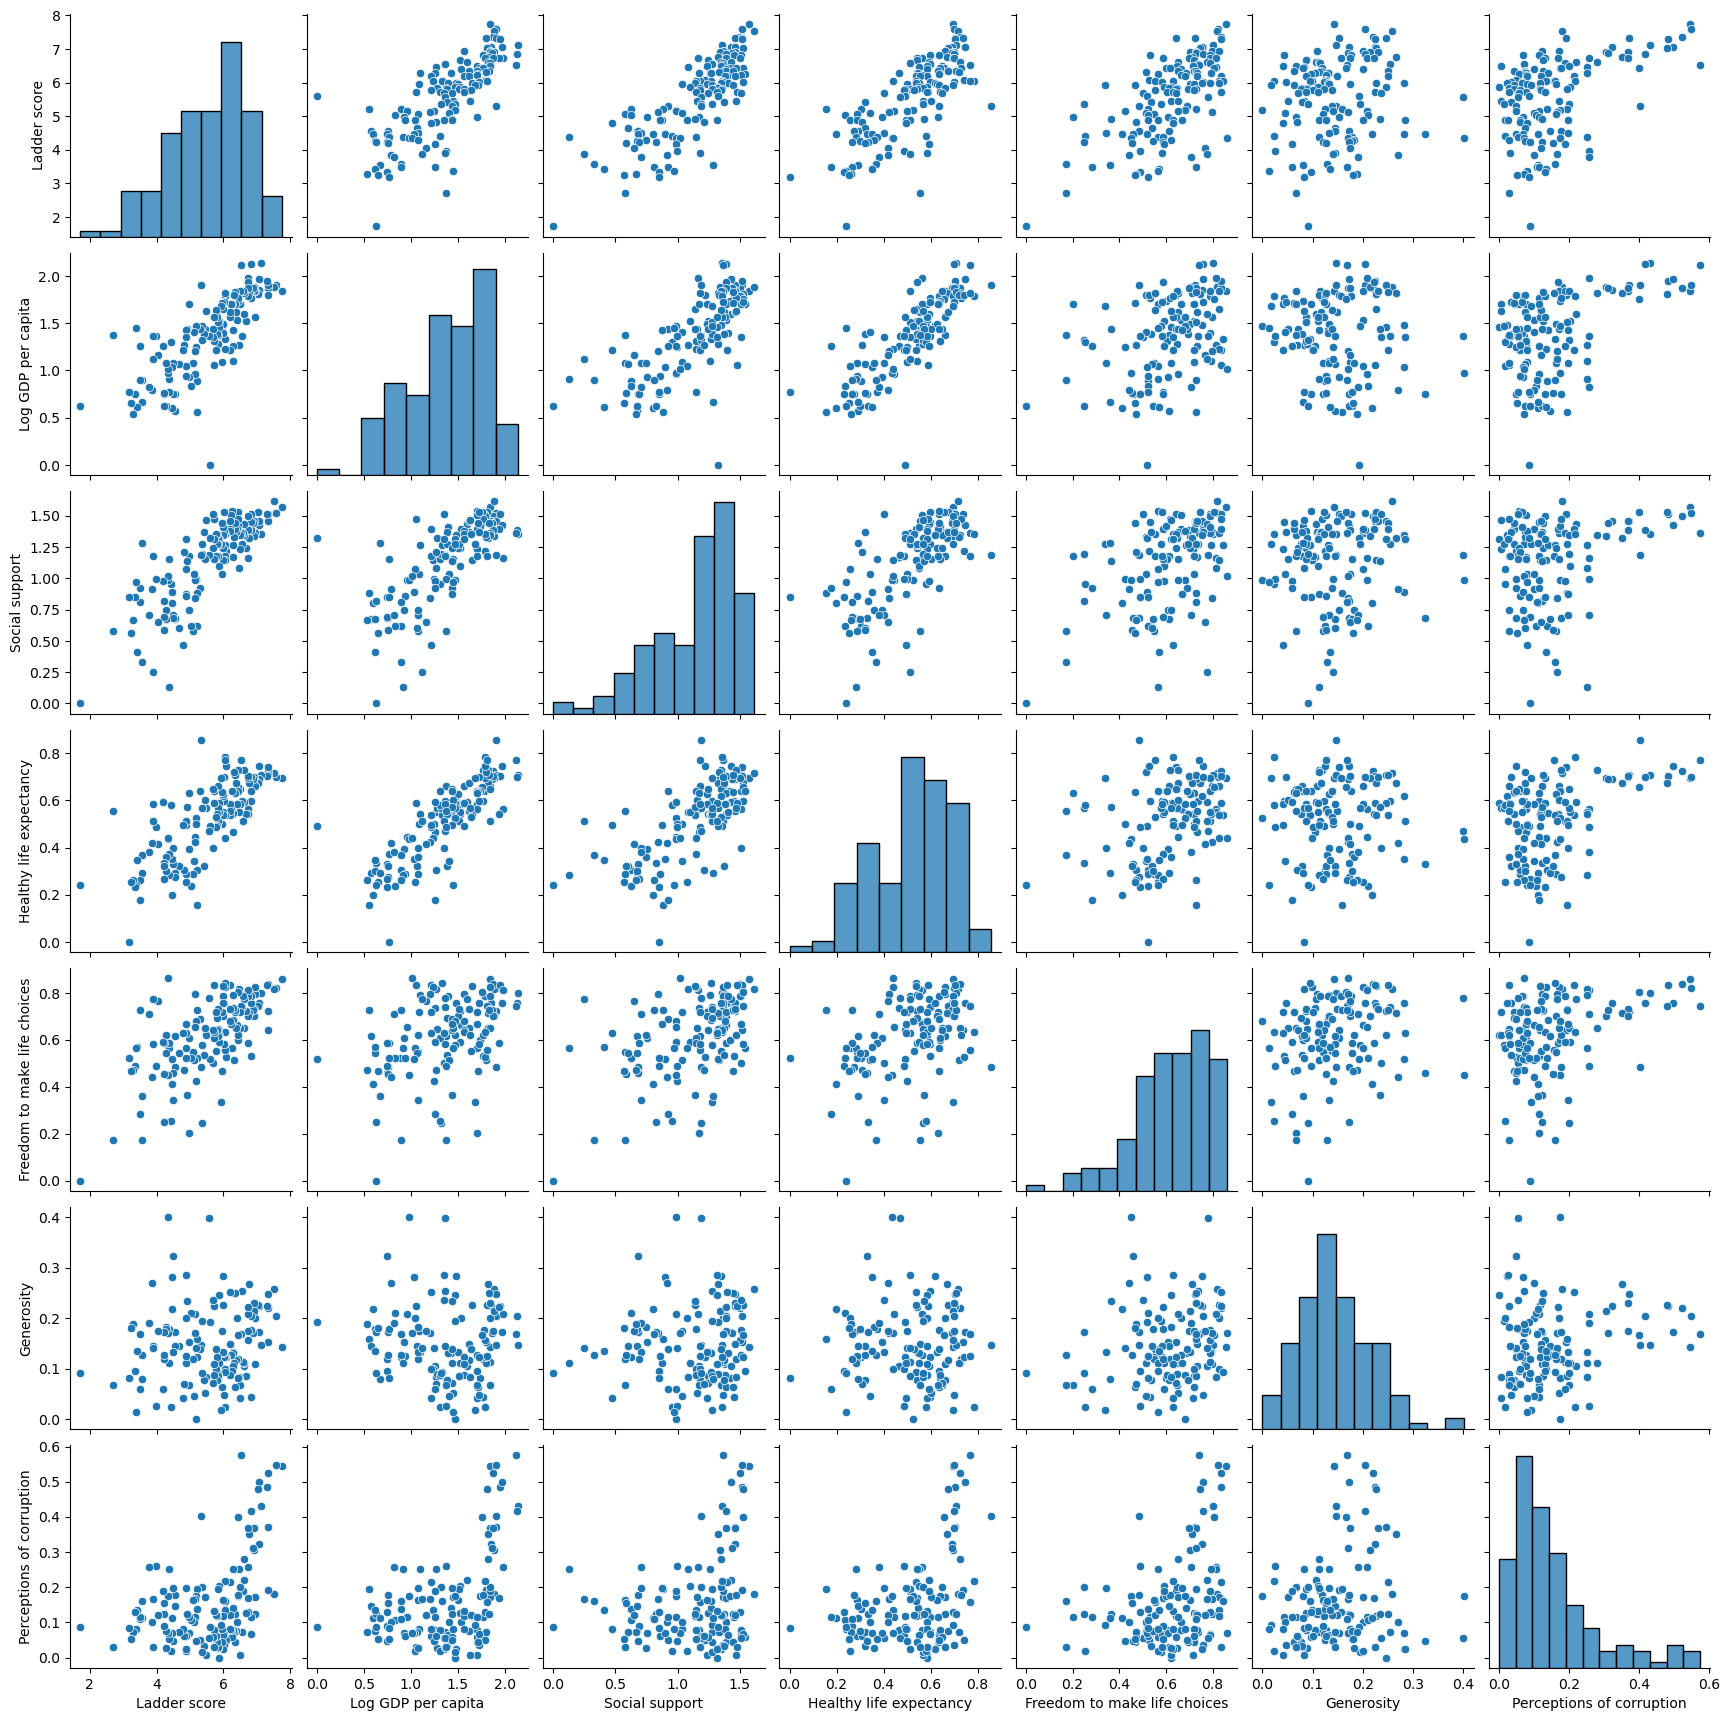

In [100]:
# Szukam zmiennych, dla których będzie mozna zaobserowawać jakąś większą zależność.
sns.pairplot(df[['Ladder score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

Widać silniejsze zaleznosci np. między Social Support i Ladder Score oraz między Log GDP per capita i Healthy Life Expectancy.
Niekiedy widać również żyrafę lub diplodoka.

Text(0.5, 1.0, 'Social support vs Ladder Score by region')

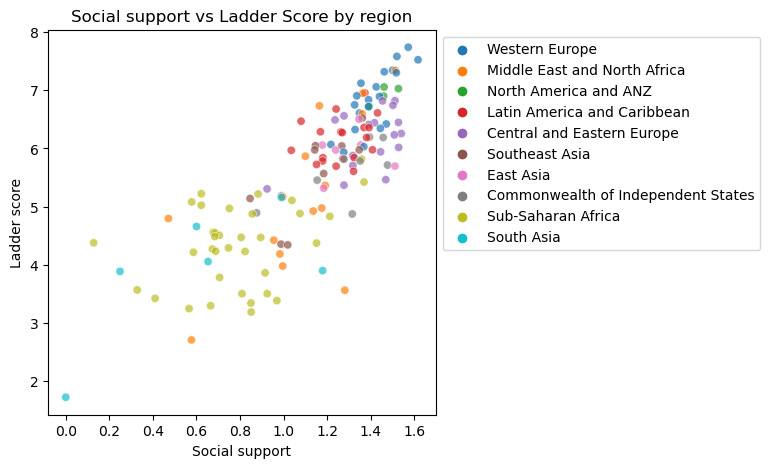

In [107]:
# Social support vs Ladder Score by region
plt.figure(figsize=(5,5))
sns.scatterplot(x='Social support', y='Ladder score', data=df, hue='Regional indicator', palette='tab10', alpha=0.7)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Social support vs Ladder Score by region')
# reg line
# sns.regplot(x='Social support', y='Ladder score', data=df, scatter=False, color='lightcoral')

Można zaobserwowac dodatnią korelację między zmienną Ladder score a Social support (cokolwiek to Social Support znaczy) i znowu przy okazji widać, ze przeważnie najnizsze wszystko mają kraje z subsaharyjskiej Afryki, a z drugiej strony te europejskie są całkiem wysoko w obu kategoriach.

Jeszcze byłem ciekaw, co to za kropeczka z południowej Azji, która ma wszystko tak nisko:

In [98]:
# Top 5 countries with the lowest Ladder score
df.sort_values(by='Ladder score').head(5)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
142,Afghanistan,South Asia,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
